### Raster Transformation

Transforms
Raster transformations are the operations that maps pixels of a source raster to a destination raster with an associated coordinate reference systems. The CRSs of source and destination raster may or may not be different.

To perform transformations we will use a Landsat-8 dataset in this lab. It is publicly accessible at https://landsat-pds.s3.amazonaws.com/L8/042/034/LC80420342013156LGN00/index.html

More information on Landsat-8 can be found here. We will be using two bands of the scene, red and near-infrared for the rest of the labs.

Obtaining the red and near-infrared bands of Landsat-8 collection

In [3]:
### Obtaining red and near-infrared bands

import urllib.request
import shutil
from pathlib import Path

RED_BAND_URL = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20190312_20190325_01_T1/LC08_L1TP_169056_20190312_20190325_01_T1_B4.TIF'
local_file_name = 'red_band.TIF'

file_path = Path('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/')
file_path /= local_file_name

with urllib.request.urlopen(RED_BAND_URL) as response, file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response, outfile)

NIR_BAND_URL = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20190312_20190325_01_T1/LC08_L1TP_169056_20190312_20190325_01_T1_B5.TIF'
local_file_name = 'nir_band.TIF'

file_path = Path('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/')
file_path /= local_file_name

with urllib.request.urlopen(NIR_BAND_URL) as response, file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response, outfile)

### Load raster data files
Let's load the raster files that we obtained in the previous step and visualize them.

In [5]:
### Loading ###
import rasterio
import numpy as np
from pprint import pprint
import time

# start = time.time()

with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/red_band.TIF') as src:
    red_band = src.read()

with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/nir_band.TIF') as src:
    nir_band = src.read()
    
# end = time.time()
# print("It took {} milli-seconds to load the raster files".format((end-start)*1000))

### Visualizing

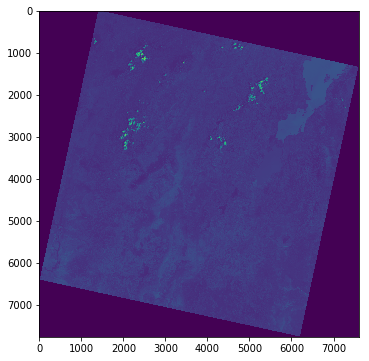

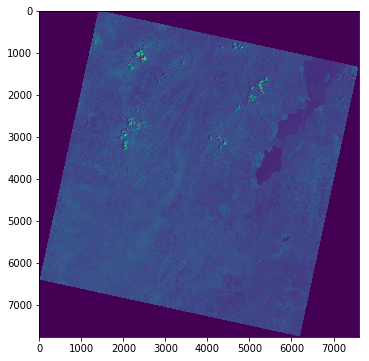

It took 2847.99861907959 milli-seconds to display the raster files


In [13]:
### Visualizing
from rasterio.plot import show
import matplotlib.pyplot as plt

%matplotlib inline

start = time.time()

fig = plt.figure(figsize= (6,6))
rasterio.plot.show(red_band)

fig = plt.figure(figsize= (6,6))
rasterio.plot.show(nir_band)
end = time.time()
print("It took {} milli-seconds to display the raster files".format((end-start)*1000))

Loading and visualizing the two raster images took a good amount of time. Please uncomment the lines
 and see how long it took to process the images. 

In [14]:
start = time.time()
end = time.time()
print("It took {} milli-seconds to display the raster files".format((end-start)*1000))

It took 0.0 milli-seconds to display the raster files


in the above to cells to measure the time in milli-seconds and record the time, which is It took 2847.99861907959 milli-seconds to display the raster files

### Why did it take so long?
To understand the reason, let's check the size of each raster image.

In [15]:
print(red_band.shape)
print(nir_band.shape)

(1, 7761, 7601)
(1, 7761, 7601)


Now you see the reason, the images are of size (1×7761×7601, i.e., 59 Megapixels), which is why it took so long to render the images. It takes a long time to perfom any operation on such large images.

So, the transformation that we will be learning in this lab is to reduce the size of image, while maintaining the resemblance with the original image. This is the downsampling transformation.

### Downsampling
Downsampling is the process of converting high-resolution rasterdata (images) into lower-resolution images. The following code presents the simplest way to downsample raster images using rasterio. As the images are of size (1×7761×7601), we shall reduce it to (1×776×760)

In [17]:
import rasterio
import numpy as np

# Create an empty NumPy ND-array of the specified size and with the Unsigned Integer, 16-bit datatype
red_band = np.empty(shape=(1,776,760), dtype = np.uint16)
nir_band = np.empty(shape=(1,776,760), dtype = np.uint16)
with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/red_band.TIF') as src:
    # Note, we provide a container to receive the data
    src.read(out = red_band)

with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/nir_band.TIF') as src:
    # Note, we provide a container to receive the data
    src.read(out= nir_band)

To get an idea of performance gain, let's time the visualization code.

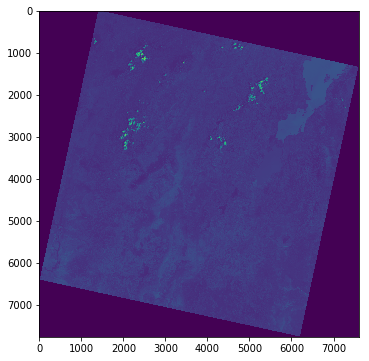

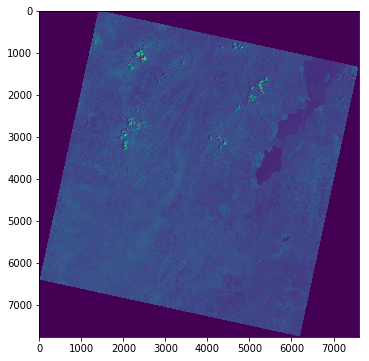

It took 2967.9927825927734 milli-seconds to display the raster files


In [20]:
from rasterio.plot import show
import matplotlib.pyplot as plt

%matplotlib inline

start = time.time()

fig = plt.figure(figsize= (6,6))
rasterio.plot.show(redband)

fig = plt.figure(figsize=(6,6))
rasterio.plot.show(nirband)

end = time.time()
print("It took {} milli-seconds to display the raster files".format((end-start)*1000))

From now on, we would be dealing with the downsampled images. Here we present another way of downsampling raster data, and save the downsampled images to the temp folder.

In the code, we create a new empty array downsampled to store the downsampled version of the original image, set its height and width to 1/10th of the height and widths of the original image.

Note: The type of variables redband and downsampled has to match. In our case, both of them are of uint16.

In [26]:
from rasterio import Affine
from rasterio.warp import reproject
import rasterio.warp 

import numpy as np
%matplotlib inline

src = rasterio.open('C:/Users/mac/Documents/Python_Rasterio/Raster_Transform/red_band.TIF')
red_band = src.read()
height = round(red_band.shape[1]/10)
width = round(red_band.shape[2]/10)
downsampled = np.empty(shape = (redband.shape[0], height, width), dtype = np.uint16)

Before we proceed with the downsampling, let's inspect and understand the transform property of source raster

In [27]:
print(src.transform)

| 30.00, 0.00, 176085.00|
| 0.00,-30.00, 755715.00|
| 0.00, 0.00, 1.00|


In [36]:
from rasterio.transform import Affine
dst_transform = Affine(0.00, 176085.00,
                       0.00, 755715.00,
                      0.00, 0.00)
dst_transform = Affine.copy

dst_transform[1] = dst_transform[5]*10
dst_transform[5] = dst_transform[1]*10

print(dst_transform)

AttributeError: type object 'Affine' has no attribute 'copy'

In [30]:
reproject(
    redband, 
    downsampled,
    src_transform = src.transform,
    src_crs = src.crs,
    dst_transform = dst_transform,
    dst_crs = src.crs,
    resampling = RESAMPLING.nearest)

fig = plt.figure(figsize=(6,6))
rasterio.plot.show(downsampled)

NameError: name 'dst_transform' is not defined